<a href="https://colab.research.google.com/github/Rbl2022/Lead_Score_Model/blob/Model_Raj/Copy_of_Lead_Score_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Steps Performed
<hr/>

  - **Importing Libraries & Data Reading**
  - **Data Cleaning & EDA**
  - **Dummy Variable Creation**
  - **Scaling & Model Building**
  - **Model Evaluation**
  - **Ploting ROC Curve**
  - **Finding Optimal CutOff**
  - **Model Evaluation on Test Data**
  - **Final Observation**

###  Import Libraries & Data Reading
<hr/>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings


warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns',42)

In [ ]:
# loading dataset
leads_df=pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#Checking shape of dataframe
leads_df.shape

(9240, 37)

- We can see our data contains 9240 rows & 37 columns.

In [ ]:
#Checking details of dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that there are columns have missing values.

## Data Cleaning & EDA
<hr/>

#### Treatment of columns having high null values
<hr/>

In [ ]:
#Converting 'Select' values to NaN.

leads_df = leads_df.replace('Select', np.nan)

In [ ]:
# Lets see column wise Null Values %
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- **We can see there are lots of columns which have more than 40% null values.**
- **Hence we will drop these columns.**

In [ ]:
#dropping columns having more than 40% null values
for i in leads_df.columns:
    if round((leads_df[i].isnull().sum()/leads_df.shape[0])*100,2)>40:
        leads_df.drop(i,axis=1,inplace=True)

In [ ]:
#lets recheck the dataframe for null values
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- **We dropped the columns having more than 40% null values.**

Letus check columns one by one & clean them


In [ ]:
#Checking Prospect ID Columns
print("Total Prospect ID's =",leads_df['Prospect ID'].count())
print("Total unique Prospect ID's =" ,leads_df['Prospect ID'].nunique())


Total Prospect ID's = 9240
Total unique Prospect ID's = 9240


We can say for each record we are having unique prospect ID , hence we can drop this column.This is confirmed by data dictionary also.

In [ ]:
#dropping Prospect ID columns
leads_df.drop('Prospect ID',axis=1,inplace=True)

In [ ]:
#Checking Lead number
print("Total Lead Number's =",leads_df['Lead Number'].count())
print("Total unique Lead Number's =" ,leads_df['Lead Number'].nunique())


Total Lead Number's = 9240
Total unique Lead Number's = 9240


We can say for each record we are having unique Lead Number , hence we can drop this column.

In [ ]:
# dropping Lead Number 
leads_df.drop("Lead Number",axis=1,inplace=True)

In [ ]:
# Checking Lead Origin
leads_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

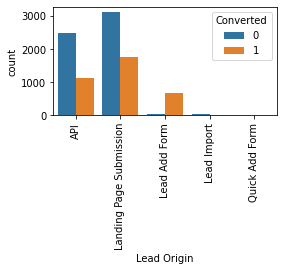

In [ ]:
# Lets do Univariate Analysis of Lead Origin 
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df['Lead Origin'],hue=leads_df['Converted'])
plt.xticks(rotation=90)
plt.show()

- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [ ]:
# Checking lead source column
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We can see there is two type of Google is written, since python is case senstive ,it is apperings as another varible category.
- We can change google to Google.
- We can merge few low value count columns to others.

In [ ]:
leads_df['Lead Source']=leads_df['Lead Source'].replace("google","Google")
leads_df['Lead Source']=leads_df['Lead Source'].replace(["Facebook",'youtubechannel','Live Chat'],'Social Media')
leads_df['Lead Source']=leads_df['Lead Source'].replace(["blog", "Pay per Click Ads","bing","WeLearn","Click2call","welearnblog_Home","testone","Press_Release","NC_EDM"],"Others")

In [ ]:
# Lets check Lead Source Column again
leads_df['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          60
Others                18
Name: Lead Source, dtype: int64

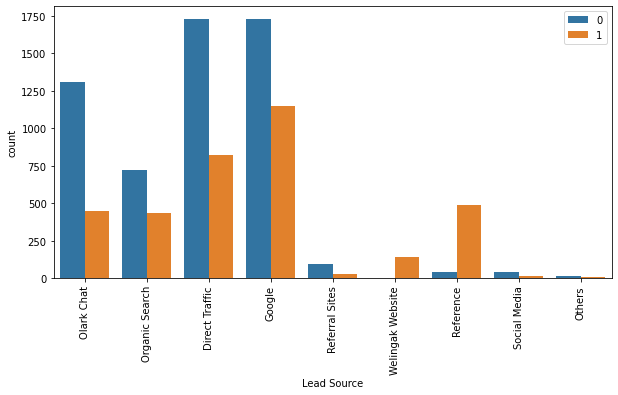

In [ ]:
# Lets do Univariate Analysis of Lead Source 
plt.figure(figsize=(10,5))
s1=sns.countplot(leads_df['Lead Source'], hue=leads_df['Converted'])
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.show()

 - **We Can see leads of Welingak Website & Reference have very higher conversion rate.**
 - **Where as Google, Direct Traffic , Organic Search & Olark Chat has lesser conversion ratio.**

In [ ]:
# Lets check Country 
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [ ]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

leads_df['Country']=leads_df['Country'].replace(np.NaN,"India")

In [ ]:
#Lets check Country column again
leads_df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [ ]:
# Lets see % wise contribution
round((leads_df['Country'].value_counts()/leads_df['Country'].count())*100,2)

India                   96.89
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

**We Can See Clearly for 96% Leads country is India Only. Therefore we can drop this column.**

In [ ]:
#dropping country column
leads_df.drop("Country",1,inplace=True)

In [ ]:
#Letus check City Column
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
#Since Mumbai is mode of this column values , we can replace NaN values to Mumbai
leads_df['City']=leads_df['City'].replace(np.NaN,"Mumbai")

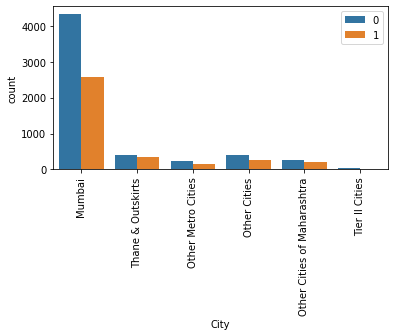

In [ ]:
# Lets do Univariate Analysis of city 
plt.figure(figsize=(6,3))
s1=sns.countplot(leads_df['City'], hue=leads_df['Converted'])
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.show()

In [ ]:
leads_df["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Since Email Opened is mod of the column , we can replace NaN values to Email Opened .
We can merge fewer value_counts to others


In [ ]:
leads_df["Last Activity"]=leads_df["Last Activity"].replace(np.NaN,"Email Opened")
leads_df["Last Activity"]=leads_df["Last Activity"].replace(["Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Received","Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails"],"Others")

In [ ]:
leads_df["Last Activity"].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: Last Activity, dtype: int64

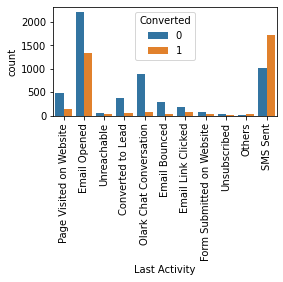

In [ ]:
# Lets check the spread of Last Activity
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["Last Activity"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

**We can clearly see that SMS Sent has high conversion rate than others.**

In [ ]:
# Lets check Specialization column
leads_df["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
# Since No column is having more counts than NaN values , we can imput Others in place of NaN values.
leads_df["Specialization"]=leads_df["Specialization"].replace(np.NaN,"Others")

In [ ]:
# Since there are many columns having Management in common we can merge them into one.
leads_df["Specialization"]=leads_df["Specialization"].replace(["Finance Management","Human Resource Management",
                                                               "Marketing Management",
                                                               "Operations Management",
                                                               "IT Projects Management","Supply Chain Management",
                                                              "Healthcare Management",
                                                               "Hospitality Management",
                                                               "Retail Management"],"Management")
leads_df["Specialization"]=leads_df["Specialization"].replace(["E-COMMERCE","E-Business"],"E_Commerce")

In [ ]:
leads_df["Specialization"].value_counts(dropna=False)

Management                           4253
Others                               3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E_Commerce                            169
Rural and Agribusiness                 73
Services Excellence                    40
Name: Specialization, dtype: int64

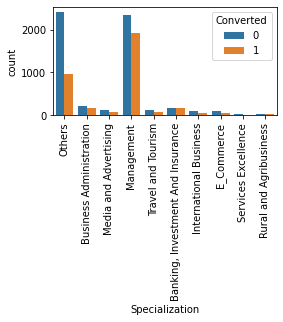

In [ ]:
# Lets check spread of Specialization column
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["Specialization"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Lets check Column-- What is your current occupation
leads_df["What is your current occupation"].value_counts(dropna=False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
#Changing NaN Values to Unemployed Category
leads_df["What is your current occupation"]=leads_df["What is your current occupation"].replace(np.NaN,"Unemployed")

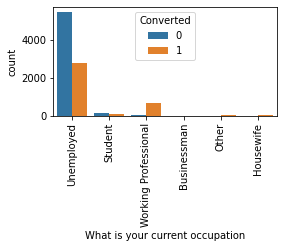

In [ ]:
#Letus check the spread of column with respect to Converted Column
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["What is your current occupation"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

- **We can clearly see that Working Professional are more succesfull leads.**
- **In terms of absolute numbers , unemployed is high.**

In [ ]:
#Lets check What matters most to you in choosing a course column
leads_df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
#We Can replace NaN values to Better Career Prospects.
leads_df["What matters most to you in choosing a course"]=leads_df["What matters most to you in choosing a course"].replace(np.NaN,"Better Career Prospects")

In [ ]:
# Lets check again
leads_df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Since column category is almost same as "Better Career Prospects". We can drop this column.

In [ ]:
# Creating list of column to be dropped
Drop_Column=[]

In [ ]:
#adding column to Dr0p_Column list
Drop_Column.append("What matters most to you in choosing a course")

In [ ]:
#Lets check Search Column
leads_df["Search"].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [ ]:
#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Search")

In [ ]:
# Lets check Magazine Column
leads_df["Magazine"].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [ ]:
#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Magazine")

In [ ]:
#Lets check Newspaper Article column
leads_df["Newspaper Article"].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [ ]:
#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Newspaper Article")

In [ ]:
# Letus check X Education Forums column
leads_df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [ ]:
#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("X Education Forums")

In [ ]:
# Lets check Newspaper Column
leads_df["Newspaper"].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [ ]:

#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Newspaper")

In [ ]:
# Letus check Digital Advertisement column
leads_df["Digital Advertisement"].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [ ]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Digital Advertisement")

In [ ]:
# Letus check Through Recommendations column
leads_df["Through Recommendations"].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [ ]:

# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Through Recommendations")

In [ ]:
# Letus check Receive More Updates About Our Courses column
leads_df["Receive More Updates About Our Courses"].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [ ]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Receive More Updates About Our Courses")

In [ ]:
# Letus Check Tags column
leads_df["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

We can convert NaN values to Will revert after reading the email.
Also we can merge fewer value counts columns to others

In [ ]:
leads_df['Tags']=leads_df['Tags'].replace(np.NaN,"Will revert after reading the email")

In [ ]:
leads_df["Tags"]=leads_df["Tags"].replace(["invalid number","Diploma holder (Not Eligible)",
                                           "wrong number given","opp hangup",
                                           "number not provided","in touch with EINS","Lost to Others","Still Thinking"
                                           ,"Want to take admission but has financial problems","In confusion whether part time or DLP",
                                           "Interested in Next batch","Lateral student","Shall take in the next coming month",
                                           "University not recognized","Recognition issue (DEC approval)"],"Others")

In [ ]:
# Letus check again
leads_df["Tags"].value_counts(dropna=False)

Will revert after reading the email    5425
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

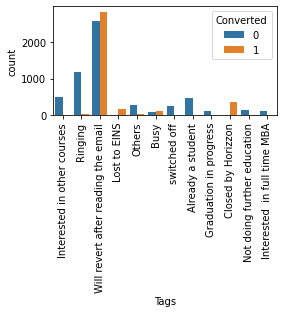

In [ ]:
# Letus check spread of column with respect to  converted 
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["Tags"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Letus check 'Update me on Supply Chain Content' column
leads_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [ ]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Update me on Supply Chain Content")

In [ ]:
# Letus check 'Get updates on DM Content'
leads_df["Get updates on DM Content"].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [ ]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Get updates on DM Content")

In [ ]:
# Letus check Do Not Call column
leads_df["Do Not Call"].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [ ]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Do Not Call")

In [ ]:
# Letus check Do Not Email column
leads_df["Do Not Email"].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [ ]:
# Letus check I agree to pay the amount through cheque column
leads_df["I agree to pay the amount through cheque"].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [ ]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("I agree to pay the amount through cheque")

In [ ]:
# Letus check 'A free copy of Mastering The Interview' column
leads_df["A free copy of Mastering The Interview"].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [ ]:
# Letus check 'Last Notable Activity' column
leads_df["Last Notable Activity"].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [ ]:
# letus merge fewer count to Others category
leads_df["Last Notable Activity"]=leads_df["Last Notable Activity"].replace(["Email Bounced","Unsubscribed",
                    "Unreachable"   ,  "Had a Phone Conversation" ,"Email Marked Spam" ,"Approached upfront"  ,
                     "Resubscribed to emails","View in browser link Clicked","Form Submitted on Website",
                "Email Received " ],"Others")

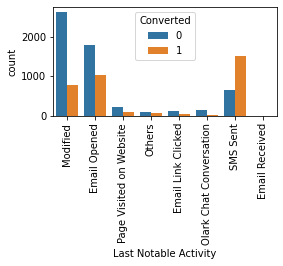

In [ ]:
# Letus check spread of the column with respect to converted
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["Last Notable Activity"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Letus drop the columns of Drop_Column list
leads_df.drop(Drop_Column,axis=1, inplace=True)

In [ ]:
# Letus check final dataframe
leads_df.shape

(9240, 14)

In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [ ]:
# Letus check again for null value percentage
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [ ]:
# Since only 1.5 % values have are missing , we can drop these rows.Lets dropp null rows
leads_df=leads_df.dropna()

In [ ]:
# Letus check again for null value percentage
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Finally we have reduced our dataframe columns from 37 to 14 . Also we have dealt with null values.

### Analysis of Numerical variables
<hr/>

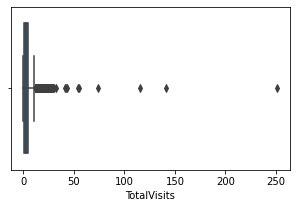

In [ ]:
# letus check Total Visits
plt.figure(figsize=(5,3))
sns.boxplot(leads_df["TotalVisits"])
plt.show()

In [ ]:
# Seems it contains outliers .Letus check for the same.
leads_df["TotalVisits"].describe([.10,.25,.5,.75,.9,.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

We can see that it contains outlier. Lets treat the outlier.

In [ ]:
Q3=leads_df.TotalVisits.quantile(0.99)
Q1=leads_df.TotalVisits.quantile(0.01)
  #lets remove 1% values from top & bottom.
leads_df=leads_df[leads_df.TotalVisits<=Q3]
leads_df=leads_df[leads_df.TotalVisits>=Q1]

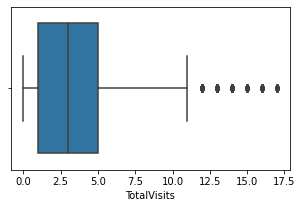

In [ ]:
#Letus plot boxplot again to check.
plt.figure(figsize=(5,3))
sns.boxplot(leads_df["TotalVisits"])
plt.show()

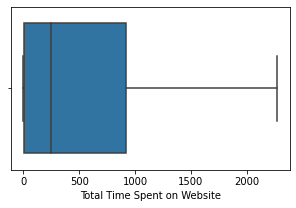

In [ ]:
# letus check Total Time Spent on Website
plt.figure(figsize=(5,3))
sns.boxplot(leads_df["Total Time Spent on Website"])
plt.show()

In [ ]:
#letus check qunatiles for outliers
leads_df["Total Time Spent on Website"].describe([.10,.25,.5,.75,.9,.99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
10%         0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

- There are no major outliers avaliable so we can proceed.

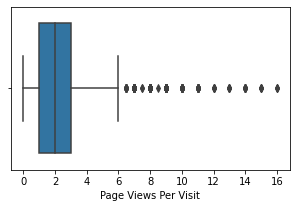

In [ ]:
# Letus check Page Views Per Visit   
plt.figure(figsize=(5,3))
sns.boxplot(leads_df["Page Views Per Visit"])
plt.show()

In [ ]:
# Seems it also contains few outliers . letus check quantile for the same.
leads_df["Page Views Per Visit"].describe([.10,.25,.5,.75,.9,.99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [ ]:
Q3=leads_df['Page Views Per Visit'].quantile(0.99)
Q1=leads_df['Page Views Per Visit'].quantile(0.01)
  #lets remove 1% values from top & bottom.
leads_df=leads_df[leads_df['Page Views Per Visit']<=Q3]
leads_df=leads_df[leads_df['Page Views Per Visit']>=Q1]

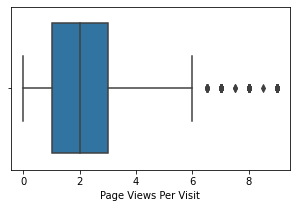

In [ ]:


#Letus plot boxplot again to check.
plt.figure(figsize=(5,3))
sns.boxplot(leads_df["Page Views Per Visit"])
plt.show()

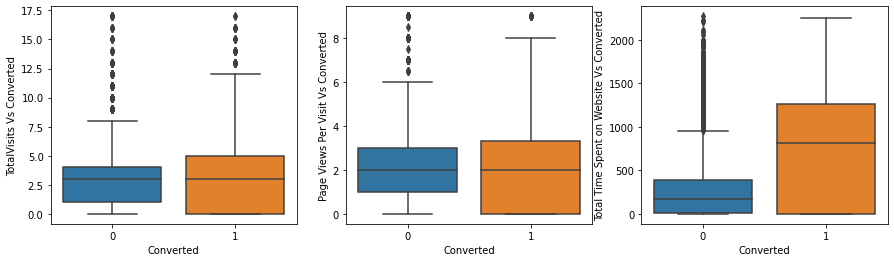

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y=leads_df["TotalVisits"],x=leads_df["Converted"])
plt.ylabel("TotalVisits Vs Converted")

plt.subplot(1,3,2)
sns.boxplot(y=leads_df['Page Views Per Visit'],x=leads_df["Converted"])
plt.ylabel("Page Views Per Visit Vs Converted")


plt.subplot(1,3,3)
sns.boxplot(y=leads_df['Total Time Spent on Website'],x=leads_df["Converted"])
plt.ylabel("Total Time Spent on Website Vs Converted")

plt.show()

- We can see & clearly say that leads spending higher times on website have higher convrsion rate.

In [ ]:
# Lets us check our final dataframe shape
leads_df.shape

(8924, 14)


### Dummy Variable creation
<hr/>

In [ ]:
Categorical_columns=list(leads_df.select_dtypes(include=['object']).columns)
Categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [ ]:
leads_df["A free copy of Mastering The Interview"]=leads_df["A free copy of Mastering The Interview"].apply(lambda x: 1 if x =="Yes" else 0)

leads_df["Do Not Email"]=leads_df["Do Not Email"].apply(lambda x: 1 if x =="Yes" else 0)

In [ ]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads_df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads_df = pd.concat([leads_df,dummy],1)

In [ ]:
dummy = pd.get_dummies(leads_df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Others'], 1)
leads_df = pd.concat([leads_df, dummy], axis = 1)

In [ ]:
dummy = pd.get_dummies(leads_df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads_df = pd.concat([leads_df, dummy], axis = 1)

In [ ]:
dummy = pd.get_dummies(leads_df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads_df = pd.concat([leads_df, dummy], axis = 1)

In [ ]:
dummy = pd.get_dummies(leads_df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Others'], 1)
leads_df = pd.concat([leads_df, dummy], axis = 1)

In [ ]:
dummy = pd.get_dummies(leads_df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
leads_df = pd.concat([leads_df, dummy], axis = 1)

In [ ]:
# Dropping original columns from data frame
leads_df.drop(Categorical_columns,1,inplace=True)

In [ ]:
# Final dataframe after dummy creation
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E_Commerce,Specialization_International Business,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 62 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8924 non-null   int64  
 1   TotalVisits                                           8924 non-null   float64
 2   Total Time Spent on Website                           8924 non-null   int64  
 3   Page Views Per Visit                                  8924 non-null   float64
 4   Lead Origin_Landing Page Submission                   8924 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8924 non-null   uint8  
 6   Lead Origin_Lead Import                               8924 non-null   uint8  
 7   What is your current occupation_Housewife             8924 non-null   uint8  
 8   What is your current occupation_Other                 8924

### Train-Test Split
<hr/>

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Putting response variable to y
y = leads_df['Converted']

X=leads_df.drop('Converted', axis=1)

In [ ]:
print(y.shape)
print(X.shape)

(8924,)
(8924, 61)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.70,random_state=1)

In [ ]:
print(X_train.shape)
print(y_test.shape)

(6246, 61)
(2678,)


### Scaling the variables
<hr/>

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E_Commerce,Specialization_International Business,Specialization_Management,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5423,-0.043456,1.746462,-0.667244,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8220,0.645441,1.667493,1.465942,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
7643,-0.732353,-0.461019,-0.667244,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1313,0.989889,1.177145,-0.133947,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3840,0.300993,1.439766,-0.133947,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Model Building using Stats Model & RFE
<hr/>

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True])

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 37),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('What is your current occupation_Housewife', False, 27),
 ('What is your current occupation_Other', False, 41),
 ('What is your current occupation_Student', False, 44),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 43),
 ('City_Other Cities of Maharashtra', False, 31),
 ('City_Other Metro Cities', False, 45),
 ('City_Thane & Outskirts', False, 39),
 ('City_Tier II Cities', False, 15),
 ('Specialization_Banking, Investment And Insurance', False, 5),
 ('Specialization_Business Administration', False, 8),
 ('Specialization_E_Commerce', False, 12),
 ('Specialization_International Business', False, 22),
 ('Specialization_Management', False, 

In [ ]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]

In [ ]:
# Columns dropped during rfe
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E_Commerce',
       'Specialization_International Business', 'Specialization_Management',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'L

In [ ]:
# Lets build first model
X_train_sm=sm.add_constant(X_train[col])
log1=sm.GLM(y_train,X_train_sm,familiy=sm.families.Binomial())
res=log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.10338
Method:                          IRLS   Log-Likelihood:                -1767.5
Date:                Tue, 24 Jan 2023   Deviance:                       644.05
Time:                        06:15:23   Pearson chi2:                     644.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2014      0.028      7.192      0.000       0.147       0.256
Total Time Spent on Website                              0.1262      0.004     28.676      0.000       0.118       0.135
Lead Origin_Lead Add Form                                0.3598      0.019     19.443      0.000       0.324       0.396
What is your current occupation_Unemployed              -0.1381      0.026     -5.376      0.000      -0.188      -0.088
What is your current occupation_Working Professional     0.0973      0.030      3.268      0.001       0.039       0.156
Last Activity_Email Bounced                             -0.1740      0.023     -7.681      0.000      -0.218      -0.130
Last Activity_Olark Chat Conversation                   -0.1366      0.014     -9.829      0.000      -0.164      -0.109
Tags_Already a student                                  -0.0123      0.022     -0.554      0.580      -0.056       0.031
Tags_Busy                                                0.3521      0.032     10.974      0.000       0.289       0.415
Tags_Closed by Horizzon                                  0.6901      0.027     25.304      0.000       0.637       0.744
Tags_Lost to EINS                                        0.7965      0.032     24.918      0.000       0.734       0.859
Tags_Not doing further education                        -0.0009      0.036     -0.026      0.979      -0.071       0.069
Tags_Ringing                                            -0.1078      0.017     -6.421      0.000      -0.141      -0.075
Tags_Will revert after reading the email                 0.3306      0.014     24.311      0.000       0.304       0.357
Tags_switched off                                       -0.1435      0.029     -4.935      0.000      -0.200      -0.087
Last Notable Activity_SMS Sent                           0.3075      0.010     29.538      0.000       0.287       0.328
========================================================================================================================
"""

In [ ]:
# P Value of Tags_Not doing further Education is high. So we can dropp this

col=col.drop('Tags_Not doing further education',1)

In [ ]:
#Building IInd Model

X_train_sm=sm.add_constant(X_train[col])
log2=sm.GLM(y_train,X_train_sm,familiy=sm.families.Binomial())
res=log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.10336
Method:                          IRLS   Log-Likelihood:                -1767.5
Date:                Tue, 24 Jan 2023   Deviance:                       644.05
Time:                        06:15:35   Pearson chi2:                     644.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2013      0.028      7.288      0.000       0.147       0.255
Total Time Spent on Website                              0.1262      0.004     28.679      0.000       0.118       0.135
Lead Origin_Lead Add Form                                0.3598      0.019     19.444      0.000       0.324       0.396
What is your current occupation_Unemployed              -0.1381      0.026     -5.376      0.000      -0.188      -0.088
What is your current occupation_Working Professional     0.0974      0.030      3.269      0.001       0.039       0.156
Last Activity_Email Bounced                             -0.1741      0.022     -7.770      0.000      -0.218      -0.130
Last Activity_Olark Chat Conversation                   -0.1366      0.014     -9.832      0.000      -0.164      -0.109
Tags_Already a student                                  -0.0122      0.022     -0.560      0.576      -0.055       0.030
Tags_Busy                                                0.3522      0.032     11.069      0.000       0.290       0.415
Tags_Closed by Horizzon                                  0.6902      0.027     25.607      0.000       0.637       0.743
Tags_Lost to EINS                                        0.7966      0.032     25.138      0.000       0.734       0.859
Tags_Ringing                                            -0.1077      0.016     -6.617      0.000      -0.140      -0.076
Tags_Will revert after reading the email                 0.3307      0.013     25.546      0.000       0.305       0.356
Tags_switched off                                       -0.1434      0.029     -4.984      0.000      -0.200      -0.087
Last Notable Activity_SMS Sent                           0.3075      0.010     29.541      0.000       0.287       0.328
========================================================================================================================
"""

In [ ]:
# Tags_Already a Student has high p value , lets dropp it also
col=col.drop("Tags_Already a student",1)

In [ ]:
# Building IIIrd Model
X_train_sm=sm.add_constant(X_train[col])
log3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1754.3
Date:                Tue, 24 Jan 2023   Deviance:                       3508.7
Time:                        06:15:48   Pearson chi2:                 9.39e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0640      0.335     -9.137      0.000      -3.721      -2.407
Total Time Spent on Website                              0.9973      0.045     21.930      0.000       0.908       1.086
Lead Origin_Lead Add Form                                3.5063      0.275     12.764      0.000       2.968       4.045
What is your current occupation_Unemployed              -1.3621      0.310     -4.399      0.000      -1.969      -0.755
What is your current occupation_Working Professional     1.4388      0.393      3.658      0.000       0.668       2.210
Last Activity_Email Bounced                             -2.2767      0.392     -5.810      0.000      -3.045      -1.509
Last Activity_Olark Chat Conversation                   -1.0809      0.173     -6.258      0.000      -1.419      -0.742
Tags_Busy                                                3.5853      0.313     11.441      0.000       2.971       4.200
Tags_Closed by Horizzon                                 28.7594   1.26e+04      0.002      0.998   -2.46e+04    2.47e+04
Tags_Lost to EINS                                        7.8161      0.579     13.510      0.000       6.682       8.950
Tags_Ringing                                            -0.8778      0.309     -2.843      0.004      -1.483      -0.273
Tags_Will revert after reading the email                 3.7358      0.216     17.322      0.000       3.313       4.159
Tags_switched off                                       -1.3995      0.642     -2.181      0.029      -2.657      -0.142
Last Notable Activity_SMS Sent                           2.4504      0.116     21.148      0.000       2.223       2.678
========================================================================================================================
"""

In [ ]:
# Tags_Closed by Horizzon has high p value , lets dropp it also
col=col.drop("Tags_Closed by Horizzon",1)

In [ ]:
# Building IVth Model
X_train_sm=sm.add_constant(X_train[col])
log4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.7
Date:                Tue, 24 Jan 2023   Deviance:                       4059.4
Time:                        06:16:16   Pearson chi2:                 1.04e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7833      0.246     -7.253      0.000      -2.265      -1.301
Total Time Spent on Website                              0.9927      0.042     23.815      0.000       0.911       1.074
Lead Origin_Lead Add Form                                4.6063      0.254     18.155      0.000       4.109       5.104
What is your current occupation_Unemployed              -0.6677      0.244     -2.739      0.006      -1.146      -0.190
What is your current occupation_Working Professional     1.9868      0.316      6.285      0.000       1.367       2.606
Last Activity_Email Bounced                             -2.3535      0.384     -6.132      0.000      -3.106      -1.601
Last Activity_Olark Chat Conversation                   -1.0967      0.161     -6.805      0.000      -1.413      -0.781
Tags_Busy                                                1.6882      0.252      6.706      0.000       1.195       2.182
Tags_Lost to EINS                                        5.8570      0.548     10.691      0.000       4.783       6.931
Tags_Ringing                                            -2.8102      0.258    -10.881      0.000      -3.316      -2.304
Tags_Will revert after reading the email                 1.7978      0.114     15.827      0.000       1.575       2.020
Tags_switched off                                       -3.1845      0.616     -5.167      0.000      -4.392      -1.976
Last Notable Activity_SMS Sent                           2.2437      0.109     20.633      0.000       2.031       2.457
========================================================================================================================
"""

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,4.86
9,Tags_Will revert after reading the email,3.99
8,Tags_Ringing,1.75
11,Last Notable Activity_SMS Sent,1.53
3,What is your current occupation_Working Profes...,1.45
5,Last Activity_Olark Chat Conversation,1.25
1,Lead Origin_Lead Add Form,1.21
0,Total Time Spent on Website,1.15
10,Tags_switched off,1.14
6,Tags_Busy,1.13


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [ ]:
# Getting the Predicted values on the train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

5423    0.979946
8220    0.962527
7643    0.005158
1313    0.626078
3840    0.953463
5384    0.067547
6281    0.389108
8376    0.306727
1930    0.712410
4107    0.040547
dtype: float64

In [ ]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.979946  , 0.96252669, 0.00515752, ..., 0.64507724, 0.93675138,
       0.01371506])

In [ ]:
y_train_pred_Final=pd.DataFrame({'Converted':y_train.values,"Converted_Prob":y_train_pred})
y_train_pred_Final["Prospect ID"]=y_train.index

In [ ]:
y_train_pred_Final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.979946,5423
1,1,0.962527,8220
2,0,0.005158,7643
3,1,0.626078,1313
4,1,0.953463,3840


In [ ]:
y_train_pred_Final["Predicted"]=y_train_pred_Final["Converted_Prob"].map(lambda x: 1 if x>0.5 else 0)

In [ ]:
y_train_pred_Final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.979946,5423,1
1,1,0.962527,8220,1
2,0,0.005158,7643,0
3,1,0.626078,1313,1
4,1,0.953463,3840,1


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Checking confusion metrix

confusion_matrix=confusion_matrix(y_train_pred_Final.Converted,y_train_pred_Final.Predicted)
confusion_matrix

array([[3550,  310],
       [ 465, 1921]])

In [ ]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [ ]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_Final.Converted, y_train_pred_Final.Predicted))

0.8759205891770733


In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8051131601005868

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9196891191709845

In [ ]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.08031088082901554


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.8610488570147916


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8841843088418431


### PLOTTING ROC CURVE
<hr/>
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = roc_curve( y_train_pred_Final.Converted,
                                         y_train_pred_Final.Converted_Prob, drop_intermediate = False )

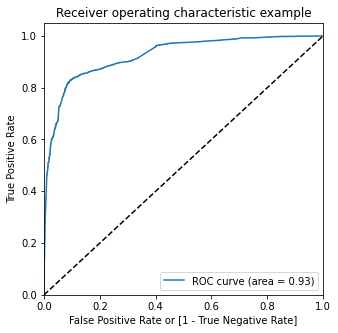

In [ ]:
draw_roc(y_train_pred_Final.Converted, y_train_pred_Final.Converted_Prob)

- The ROC Curve should be a value close to 1. 
- We are getting a good value of 0.93 indicating a good predictive model.

### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. 
We need to determine the best cut-off value and the below section deals with that.

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_Final[i]= y_train_pred_Final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_Final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.979946,5423,1,1,1,1,1,1,1,1,1,1,1
1,1,0.962527,8220,1,1,1,1,1,1,1,1,1,1,1
2,0,0.005158,7643,0,1,0,0,0,0,0,0,0,0,0
3,1,0.626078,1313,1,1,1,1,1,1,1,1,0,0,0
4,1,0.953463,3840,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_Final.Converted, y_train_pred_Final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382004  1.000000  0.000000
0.1   0.1  0.722703  0.967309  0.571503
0.2   0.2  0.779859  0.900251  0.705440
0.3   0.3  0.850464  0.856664  0.846632
0.4   0.4  0.873679  0.832775  0.898964
0.5   0.5  0.875921  0.805113  0.919689
0.6   0.6  0.868716  0.764878  0.932902
0.7   0.7  0.840378  0.648785  0.958808
0.8   0.8  0.808678  0.529757  0.981088
0.9   0.9  0.784822  0.451802  0.990674


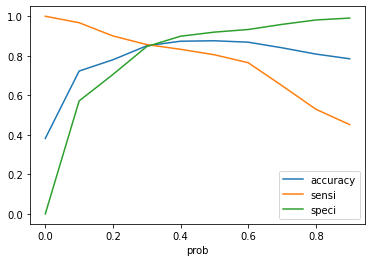

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_Final['Final_Predicted'] = y_train_pred_Final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_Final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.979946,5423,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.962527,8220,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.005158,7643,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.626078,1313,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.953463,3840,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
y_train_pred_Final['Lead_Score'] = y_train_pred_Final.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_Final[['Converted','Converted_Prob','Prospect ID','Final_Predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,Final_Predicted,Lead_Score
0,1,0.979946,5423,1,98
1,1,0.962527,8220,1,96
2,0,0.005158,7643,0,1
3,1,0.626078,1313,1,63
4,1,0.953463,3840,1,95


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_Final.Converted, y_train_pred_Final.Final_Predicted)

0.8504642971501761

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_Final.Converted, y_train_pred_Final.Final_Predicted )
confusion2

array([[3268,  592],
       [ 342, 2044]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.856663872590109

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8466321243523316

### Observation:
    - So as we can see above the model seems to be performing well.
    - The ROC curve has a value of 0.93, which is very good. We have the following values for the Train Data:

         Accuracy : 85.04%
         Sensitivity : 85.66%
         Specificity : 84.66%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [ ]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1533678756476684


In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7754172989377845


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9052631578947369


In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_Final.Converted, y_train_pred_Final.Final_Predicted )
confusion

array([[3268,  592],
       [ 342, 2044]])

In [ ]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7754172989377845

In [ ]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.856663872590109

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_Final.Converted , y_train_pred_Final.Final_Predicted)

0.7754172989377845

In [ ]:
recall_score(y_train_pred_Final.Converted, y_train_pred_Final.Final_Predicted)

0.856663872590109

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_Final.Converted, y_train_pred_Final.Final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_Final.Converted, y_train_pred_Final.Converted_Prob)

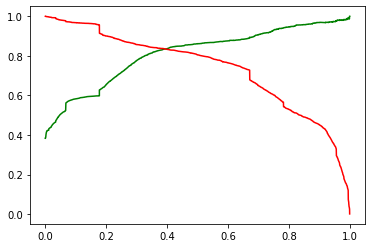

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E_Commerce,Specialization_International Business,Specialization_Management,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6215,-0.419036,1.776642,-0.169035,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2086,-1.108335,-0.877905,-1.202090,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3257,-0.074387,-0.646276,-0.427298,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1809,1.648861,1.309706,-0.169035,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3712,-0.419036,-0.127867,-0.169035,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
6215,1.776642,0,1,0,0,0,0,0,0,1,0,0
2086,-0.877905,0,1,0,0,0,0,0,0,1,0,1
3257,-0.646276,0,1,0,0,0,0,0,0,1,0,0
1809,1.309706,0,1,0,0,0,0,0,0,0,0,0
3712,-0.127867,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

6215    0.752234
2086    0.672400
3257    0.215055
1809    0.240340
3712    0.314302
7755    0.208656
3691    0.775102
8049    0.729471
335     0.956129
2610    0.198887
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
6215,0.752234
2086,0.672400
3257,0.215055
1809,0.240340
3712,0.314302


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,6215,0.752234
1,1,2086,0.672400
2,0,3257,0.215055
3,1,1809,0.240340
4,0,3712,0.314302


In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,6215,0.752234
1,1,2086,0.672400
2,0,3257,0.215055
3,1,1809,0.240340
4,0,3712,0.314302


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,6215,0,0.752234,75
1,2086,1,0.672400,67
2,3257,0,0.215055,22
3,1809,1,0.240340,24
4,3712,0,0.314302,31


In [ ]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,6215,0,0.752234,75,1
1,2086,1,0.672400,67,1
2,3257,0,0.215055,22,0
3,1809,1,0.240340,24,0
4,3712,0,0.314302,31,1


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8573562359970127

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1449,  246],
       [ 136,  847]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.861648016276704

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8548672566371681

In [ ]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7749313815187557

In [ ]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.861648016276704

### Observation:
    After running the model on the Test Data these are the figures we obtain

         Accuracy : 85.7%
         Sensitivity : 86.16%
         Specificity : 85.48%

## Final Observation 

### Train Data Set    
 - Accuracy : 85.04%
     Sensitivity : 85.66%
     Specificity : 84.66%
### Test Data Set
- Accuracy : 85.7%
     Sensitivity : 86.16%
     Specificity : 85.48%

# Conclusion

##### Top 10 parameters mostly to be considered are as below( In decreasing order of importance)

- Tags_Lost to EINS    5.857
- Lead Origin_Lead Add Form    4.6063
- Last Notable Activity_SMS Sent    2.2437
- What is your current occupation_Working Professional   1.9868
- Tags_Will Revert after reading the email   1.7978
- Tags_Busy   1.6882
- Total Time Spent on Website   0.9927
- What is your current occupation_Unemployed   -0.6677
- Last Activity_Olark Chat Conversation   -1.09967
- Last Activity_Email Bounced   -2.3535